In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.random import set_seed
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets.cifar10 import load_data
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [13]:
# budowa sieci CNN v2

set_seed(0)
model = Sequential()

model.add( Conv2D(64, kernel_size=(3,3), input_shape=(32,32,3), activation="relu", padding="same" ) )
model.add( Conv2D(64, kernel_size=(3,3), activation="relu", padding="same" ) )
model.add( MaxPool2D(pool_size=(2,2)) )

model.add( Conv2D(32, kernel_size=(3,3), activation="relu", padding="same" ) )
model.add( Conv2D(32, kernel_size=(3,3), activation="relu", padding="same" ) )
model.add( MaxPool2D(pool_size=(2,2)) )

model.add( Conv2D(16, kernel_size=(3,3), activation="relu", padding="same" ) )
model.add( Conv2D(16, kernel_size=(3,3), activation="relu", padding="same" ) )

model.add( Flatten() )
model.add( Dense(512, activation="relu") )
model.add( Dense(64, activation="relu") )

model.add( Dense(10, activation="softmax") )

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01/5)
model.compile(optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

cp = ModelCheckpoint("cifar-v1.h5", monitor="val_accuracy", save_best_only=True, save_weights_only=True)

#result = model.fit(X_train, y_train, epochs=80, validation_split=.15, callbacks=[cp])

In [14]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

In [9]:
import joblib

In [10]:
!wget -O cnn1.h5 http://51.91.120.89/extras/cnn/cnn1.h5
!wget -O cnn1-history.dump http://51.91.120.89/extras/cnn/cnn1-history.dump

--2022-06-12 07:37:07--  http://51.91.120.89/extras/cnn/cnn1.h5
Connecting to 51.91.120.89:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5131480 (4.9M)
Saving to: ‘cnn1.h5’

cnn1.h5             100%[===================>]   4.89M  1.05MB/s    in 6.4s    

2022-06-12 07:37:14 (779 KB/s) - ‘cnn1.h5’ saved [5131480/5131480]

--2022-06-12 07:37:14--  http://51.91.120.89/extras/cnn/cnn1-history.dump
Connecting to 51.91.120.89:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5318188 (5.1M)
Saving to: ‘cnn1-history.dump’

cnn1-history.dump   100%[===================>]   5.07M  1.38MB/s    in 4.3s    

2022-06-12 07:37:18 (1.19 MB/s) - ‘cnn1-history.dump’ saved [5318188/5318188]



In [15]:
model1 = tf.keras.models.load_model("cnn1.h5")
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                    

In [17]:
result = joblib.load("cnn1-history.dump")
df1 = pd.DataFrame(result.history)
df1.head(3)

,loss,accuracy,val_loss,val_accuracy
0,2.300380,0.118965,2.297431,0.1316
1,2.287369,0.171953,2.263805,0.1824
2,2.119776,0.230329,1.960914,0.2768


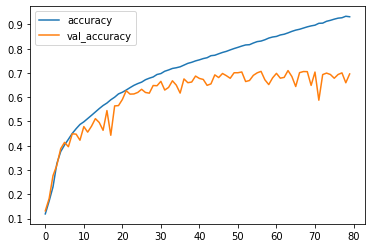

In [18]:
df1[ ["accuracy","val_accuracy"] ].plot()

In [19]:
from tensorflow.keras.layers import BatchNormalization

In [20]:
# budowa sieci CNN v2

set_seed(0)
model = Sequential()

model.add( Conv2D(128, kernel_size=(5,5), input_shape=(32,32,3), activation="relu", padding="same" ) )
model.add( BatchNormalization())
model.add( Conv2D(128, kernel_size=(5,5), activation="relu", padding="same" ) )
model.add( BatchNormalization())
model.add( MaxPool2D(pool_size=(2,2)) )

model.add( Conv2D(64, kernel_size=(5,5), activation="relu", padding="same" ) )
model.add( BatchNormalization())
model.add( Conv2D(64, kernel_size=(5,5), activation="relu", padding="same" ) )
model.add( BatchNormalization())
model.add( MaxPool2D(pool_size=(2,2)) )

model.add( Conv2D(32, kernel_size=(5,5), activation="relu", padding="same" ) )
model.add( BatchNormalization())
model.add( Conv2D(32, kernel_size=(5,5), activation="relu", padding="same" ) )
model.add( BatchNormalization())
model.add( MaxPool2D(pool_size=(2,2)) )

model.add( Conv2D(16, kernel_size=(3,3), activation="relu", padding="same" ) )
model.add( BatchNormalization())
model.add( Conv2D(16, kernel_size=(3,3), activation="relu", padding="same" ) )
model.add( BatchNormalization())
model.add( MaxPool2D(pool_size=(2,2)) )

model.add( Flatten() )

model.add( Dense(32, activation="relu") )
model.add(Dropout(.15))

model.add( Dense(16, activation="relu") )
model.add(Dropout(.05))

model.add( Dense(10, activation="softmax") )

optimizer = tf.keras.optimizers.RMSprop()
model.compile(optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

cp = ModelCheckpoint("cifar-v2.h5", monitor="val_accuracy", save_best_only=True, save_weights_only=True)

#result = model.fit(X_train, y_train, epochs=80, validation_split=.15, callbacks=[cp])

In [ ]:
model.summary()

In [22]:
!wget -O cnn2.h5 http://51.91.120.89/extras/cnn/cnn2.h5
!wget -O cnn2-history.dump http://51.91.120.89/extras/cnn/cnn2-history.dump

--2022-06-12 08:01:49--  http://51.91.120.89/extras/cnn/cnn2.h5
Connecting to 51.91.120.89:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6734736 (6.4M)
Saving to: ‘cnn2.h5’

cnn2.h5             100%[===================>]   6.42M  2.07MB/s    in 3.5s    

2022-06-12 08:01:53 (1.83 MB/s) - ‘cnn2.h5’ saved [6734736/6734736]

--2022-06-12 08:01:53--  http://51.91.120.89/extras/cnn/cnn2-history.dump
Connecting to 51.91.120.89:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7233068 (6.9M)
Saving to: ‘cnn2-history.dump’

cnn2-history.dump   100%[===================>]   6.90M  1.19MB/s    in 6.8s    

2022-06-12 08:02:00 (1.01 MB/s) - ‘cnn2-history.dump’ saved [7233068/7233068]



In [23]:
result = joblib.load("cnn2-history.dump")
df1 = pd.DataFrame(result.history)
df1.tail(5)

,loss,accuracy,val_loss,val_accuracy
75,0.053392,0.987741,1.726117,0.803333
76,0.054673,0.987600,1.599563,0.808667
77,0.055946,0.987435,1.459649,0.814533
78,0.056191,0.987341,1.689483,0.812933
79,0.051133,0.987835,1.421721,0.819867


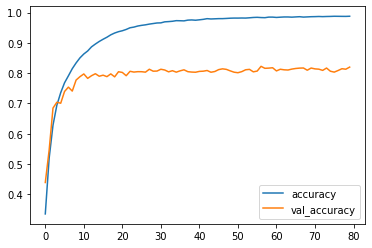

In [24]:
df1[ ["accuracy","val_accuracy"] ].plot()